In [1]:
import pyro
import pyro.distributions as dist
import torch
import matplotlib.pyplot as plt

In [2]:
dog = torch.tensor(1.)
human = torch.tensor(1.)

def model():
    pr_guilt = pyro.sample("pr_guilt", dist.Normal(.05, 0.001))

    guilt = pyro.sample("guilt", dist.Bernoulli(pr_guilt))
    
    pr_dog_if_guilt = pyro.sample("pr_dog_if_guilt", dist.Bernoulli(torch.tensor(1.)))
    pr_dog_if__not_guilt = pyro.sample("pr_dog_if_guilt", dist.Bernoulli(torch.tensor(1e-5)))

    pr_human_if__guilt = pyro.sample("pr_human_if_guilt", dist.Bernoulli(torch.tensor(1.)))
    pr_human_if__not_guilt = pyro.sample("pr_human_if__not_guilt", dist.Bernoulli(torch.tensor(1e-8)))

    dog = pyro.sample("dog", pyro.distributions.Bernoulli(
    torch.where(guilt.bool(),
                pr_dog_if_guilt,
                pr_dog_if__not_guilt)
            ))

    human = pyro.sample("human", pyro.distributions.Bernoulli(
        torch.where(guilt.bool(),
                pr_human_if__guilt,
                pr_human_if__not_guilt)
                ))



    return pr_guilt, dog, human


model()



(tensor(0.0508), tensor(0.), tensor(0.))

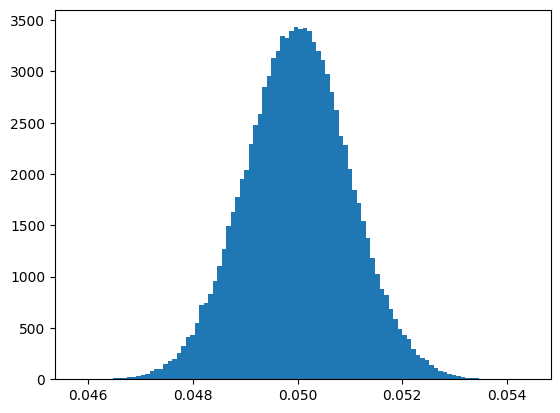

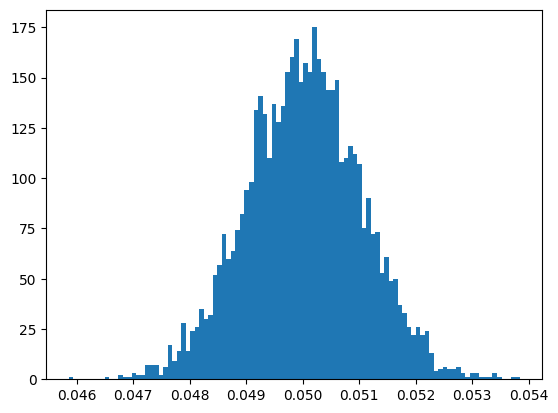

tensor(0.0513)


In [3]:
with pyro.plate("samples", 100000):
    pr_guilt, dog, human = model()

plt.hist(pr_guilt.detach().numpy(), bins=100)
plt.show()


mask_dog = (dog == 1.)
mask_human = (human == 1.)

mask_evidence = torch.logical_and(mask_dog, mask_human)
mask_evidence

plt.hist(pr_guilt[mask_evidence].detach().numpy(), bins=100)
plt.show()


print(
torch.quantile(pr_guilt[mask_evidence], 0.9) 
)

In [4]:
pyro.sample("pr_guilt", dist.Categorical(torch.tensor([0.1, 0.9])))

tensor(1)

In [5]:

def model_interval():
    pr_guilt = pyro.sample("pr_guilt", dist.Uniform(0, 1))

    guilt = pyro.sample("guilt", dist.Bernoulli(pr_guilt))
    
    interval_dog = torch.tensor([1e-5, .01])
    interval_human = torch.tensor([1e-8, .005])

    pr_dog_if_guilt = pyro.sample("pr_dog_if_guilt", dist.Bernoulli(torch.tensor(1.)))
    cat_dog_if__not_guilt = pyro.sample("cat_dog_if_guilt", dist.Categorical(torch.tensor([.5,.5])))

    pr_human_if__guilt = pyro.sample("pr_human_if_guilt", dist.Bernoulli(torch.tensor(1.)))
    cat_human_if__not_guilt = pyro.sample("cat_human_if__not_guilt", dist.Categorical(torch.tensor([.5,.5])))

    
    dog = pyro.sample("dog", pyro.distributions.Bernoulli(
    torch.where(guilt.bool(),
                pr_dog_if_guilt,
                interval_dog[cat_dog_if__not_guilt])
            ))

    human = pyro.sample("human", pyro.distributions.Bernoulli(
        torch.where(guilt.bool(),
                pr_human_if__guilt,
                interval_dog[cat_human_if__not_guilt])
                ))



    return pr_guilt, dog, human

model_interval()

(tensor(0.0842), tensor(0.), tensor(0.))

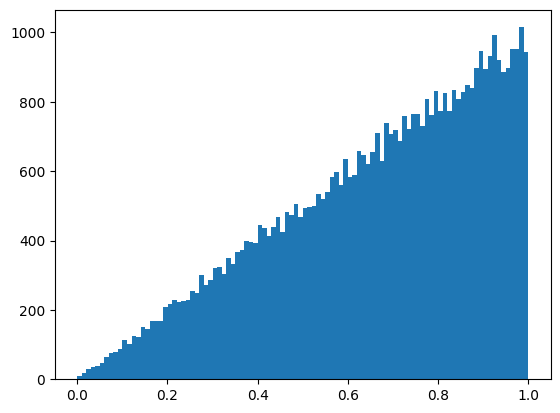

tensor(0.9476)


In [6]:
with pyro.plate("samples", 100000):
    pr_guilt2, dog2, human2 = model_interval()

mask_dog2 = (dog2 == 1.)
mask_human2 = (human2 == 1.)
mask_evidence2 = torch.logical_and(mask_dog2, mask_human2)

plt.hist(pr_guilt2[mask_evidence2].detach().numpy(), bins=100)
plt.show()    

print(
torch.quantile(pr_guilt2[mask_evidence2], 0.9) 
)

In [45]:
l1, r1 = 0.1, .3
l2, r2 = .05, .4

l3, r3 = l1 * l2, r1 * r2

print(l3, r3)

0.005000000000000001 0.12
